# Preliminaries
To use the MIT-BIH database we need the external python library wfdb.

To install wfdb simply run "pip install wfdb". More info about wfdb can be found here https://wfdb.readthedocs.io/en/latest/

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import collections

import wfdb

In [3]:
record = wfdb.rdrecord('src/mitdb/100')
annotation = wfdb.rdann('src/mitdb/100', 'atr')
display(record.__dict__)
display(annotation.__dict__)

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [5]:
# All relevant symbols for this research.
relsym = set("NLRejV!EAaSJF/fQ")
patients = {'100','101','103','105','106','107','108','109','111','112','113',
            '114','115','116','117','118','119','121','122','123','124','200',
            '201','202','203','205','207','208','209','210','212','213','214',
            '215','217','219','220','221','222','223','228','230','231','232',
            '233','234',}


def to_aami(ba):
    if ba in set("NLRej"):
        return "Normal"
    if ba in set("V!E"):
        return "Ventricular"
    if ba in set("AaSJ"):
        return "Supraventricular"
    if ba == "F":
        return "Fusion beat"
    if ba in set("/fQ"):
        return "Unknown beats"
    else: 
        return "This should not be happening."


data = {}
for file in os.listdir("src/mitdb"):
    if file.endswith(".atr"):
        annotation = wfdb.rdann("src/mitdb/"+file.split(".")[0], 'atr')
        symbols = []
        for s in annotation.symbol:
            if s in relsym:
                symbols.append(s)
        count = collections.Counter(symbols)
        data[annotation.record_name] = count

In [34]:
# Print count of all BA beats per patient
for patient in data:
    print("--- Patient no. {} ---".format(patient))
    s = sum(data[patient].values())
    for (k, v) in data[patient].items():
        print("{}: {:.2%}\t{}".format(k, v/s, v))
        if k == '!':
            print("Joeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee")
    print("-----------------------")
        
    

--- Patient no. 100 ---
N: 98.50%	2239
A: 1.45%	33
V: 0.04%	1
-----------------------
--- Patient no. 101 ---
N: 99.73%	1860
Q: 0.11%	2
A: 0.16%	3
-----------------------
--- Patient no. 103 ---
N: 99.90%	2082
A: 0.10%	2
-----------------------
--- Patient no. 105 ---
N: 98.21%	2526
V: 1.59%	41
Q: 0.19%	5
-----------------------
--- Patient no. 106 ---
N: 74.35%	1507
V: 25.65%	520
-----------------------
--- Patient no. 107 ---
/: 97.24%	2078
V: 2.76%	59
-----------------------
--- Patient no. 108 ---
N: 98.64%	1739
V: 0.96%	17
F: 0.11%	2
A: 0.23%	4
j: 0.06%	1
-----------------------
--- Patient no. 109 ---
L: 98.42%	2492
F: 0.08%	2
V: 1.50%	38
-----------------------
--- Patient no. 111 ---
L: 99.95%	2123
V: 0.05%	1
-----------------------
--- Patient no. 112 ---
N: 99.92%	2537
A: 0.08%	2
-----------------------
--- Patient no. 113 ---
N: 99.67%	1789
a: 0.33%	6
-----------------------
--- Patient no. 114 ---
N: 96.86%	1820
V: 2.29%	43
J: 0.11%	2
F: 0.21%	4
A: 0.53%	10
----------------

In [38]:
tot = collections.Counter()
for c in data.values():
    tot += c

print("BA: <%>\t\t<count>")
for i, c in tot.most_common():
    print("{} : & {:.2%}\t{} ".format(i, c / sum(tot.values()), c))
    
print("---")
for i, c in tot.most_common():
    print("{} : {}\% & {}".format(i, round(c * 100 / sum(tot.values()),2), c))

BA: <%>		<count>
N : & 70.86%	74790 
L : & 7.65%	8075 
R : & 6.88%	7259 
V : & 6.75%	7124 
/ : & 3.43%	3620 
A : & 2.41%	2546 
F : & 0.76%	803 
! : & 0.45%	472 
f : & 0.25%	260 
j : & 0.22%	229 
a : & 0.14%	150 
E : & 0.10%	106 
J : & 0.08%	83 
e : & 0.02%	16 
Q : & 0.01%	15 
S : & 0.00%	2 
---
N : 70.86\% & 74790
L : 7.65\% & 8075
R : 6.88\% & 7259
V : 6.75\% & 7124
/ : 3.43\% & 3620
A : 2.41\% & 2546
F : 0.76\% & 803
! : 0.45\% & 472
f : 0.25\% & 260
j : 0.22\% & 229
a : 0.14\% & 150
E : 0.1\% & 106
J : 0.08\% & 83
e : 0.02\% & 16
Q : 0.01\% & 15
S : 0.0\% & 2


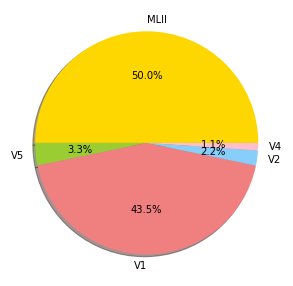

In [35]:
# prints signals used for all patients
labels, values = [], []
for file in os.listdir("mitdb"):
    if file.endswith(".atr"):
        record = wfdb.rdrecord("mitdb/"+file.split(".")[0])
        #print("--- Patient {} ---".format(record.record_name))
        for s in record.sig_name:
            #print("  - {}".format(s))
            if s in labels:
                values[labels.index(s)] += 1
            else:
                labels.append(s)
                values.append(1)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']

plt.axis('equal')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

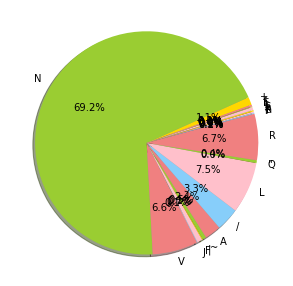

1241	1.15%	+
74790	69.16%	N
7124	6.59%	V
83	0.08%	J
803	0.74%	F
132	0.12%	|
579	0.54%	~
2546	2.35%	A
3620	3.35%	/
8075	7.47%	L
15	0.01%	Q
437	0.40%	"
7259	6.71%	R
150	0.14%	a
229	0.21%	j
193	0.18%	x
16	0.01%	e
2	0.00%	S
6	0.01%	[
472	0.44%	!
6	0.01%	]
106	0.10%	E
260	0.24%	f
Total Beats: 108144 Percentage: 102.5%


In [10]:
def make_pi(p):
    labels, values, percentage = [], [], []
    for patient in p:
        for (k, v) in data[patient].items():
            #k = to_aami(k)
            if k in labels:
                values[labels.index(k)] += v
            else:
                labels.append(k)
                values.append(v)
    s = sum(values)
    for v in values:
        percentage.append("{:.2%}".format(v/s))

    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
    explode = [0,0,0,0.2,0]

    plt.figure()
    plt.axis('equal')
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=20)
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.show()

    for i in range(len(labels)):
        print("{}\t{}\t{}".format(values[i],percentage[i],labels[i]))
    print("Total Beats: {} Percentage: {}%".format(s,round(s*100/105550,1)))

          
make_pi(patients)


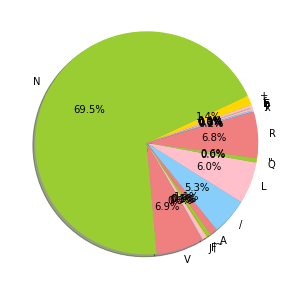

961	1.41%	+
47449	69.48%	N
4712	6.90%	V
32	0.05%	J
436	0.64%	F
74	0.11%	|
368	0.54%	~
772	1.13%	A
3620	5.30%	/
4126	6.04%	L
9	0.01%	Q
434	0.64%	"
4610	6.75%	R
146	0.21%	x
218	0.32%	j
16	0.02%	e
42	0.06%	a
2	0.00%	S
1	0.00%	E
260	0.38%	f
Total Beats: 68288 Percentage: 64.7%


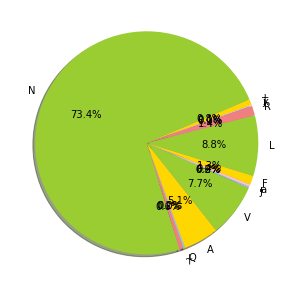

236	0.83%	+
20846	73.39%	N
172	0.61%	~
56	0.20%	|
6	0.02%	Q
1443	5.08%	A
2181	7.68%	V
3	0.01%	"
51	0.18%	J
108	0.38%	a
367	1.29%	F
2492	8.77%	L
397	1.40%	R
11	0.04%	j
37	0.13%	x
Total Beats: 28406 Percentage: 26.9%


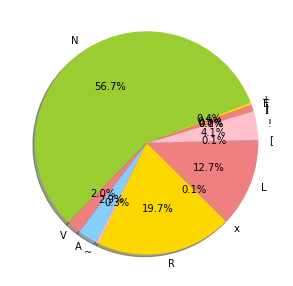

44	0.38%	+
6495	56.72%	N
231	2.02%	V
331	2.89%	A
39	0.34%	~
2252	19.67%	R
10	0.09%	x
1457	12.72%	L
6	0.05%	[
472	4.12%	!
6	0.05%	]
2	0.02%	|
105	0.92%	E
Total Beats: 11450 Percentage: 10.8%


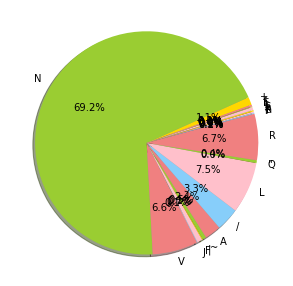

1241	1.15%	+
74790	69.16%	N
7124	6.59%	V
83	0.08%	J
803	0.74%	F
132	0.12%	|
579	0.54%	~
2546	2.35%	A
3620	3.35%	/
8075	7.47%	L
15	0.01%	Q
437	0.40%	"
7259	6.71%	R
150	0.14%	a
229	0.21%	j
193	0.18%	x
16	0.01%	e
2	0.00%	S
6	0.01%	[
472	0.44%	!
6	0.01%	]
106	0.10%	E
260	0.24%	f
Total Beats: 108144 Percentage: 102.5%


In [11]:
train = {'103','105','107','108','111','112','114','115','117','119','121','123',
            '124','200','202','205','208','209','210','212','214','215','217','219',
            '222','223','230','231','233'}

valid = {'101','106','109','113','122','201','203','213','221','228','232','234'}

tests = {'100','116','118','207','220'}

make_pi(train)
make_pi(valid)
make_pi(tests)
make_pi(train.union(valid).union(tests))

